In [1]:
import matplotlib.image as mpimg 
import os 

from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.utils import image_dataset_from_directory, to_categorical
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.models import Sequential 
from keras import layers 
from tensorflow import keras 
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
from glob import glob 
import cv2 

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# Extracting the compressed dataset. 
from zipfile import ZipFile
data_path = 'traffic-sign-dataset-classification.zip'
with ZipFile(data_path, 'r') as zip:
    zip.extractall()

In [3]:
# path to the folder containing our dataset 
dataset = 'traffic_Data/DATA'
  
# path of label file 
labelfile = pd.read_csv('traffic_labels.csv') 

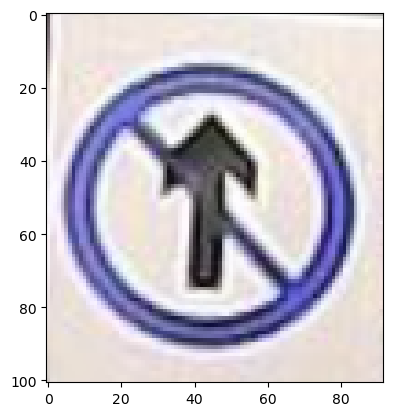

In [4]:
img = cv2.imread("/traffic_Data/DATA/10/010_0011.png") 
plt.imshow(img)

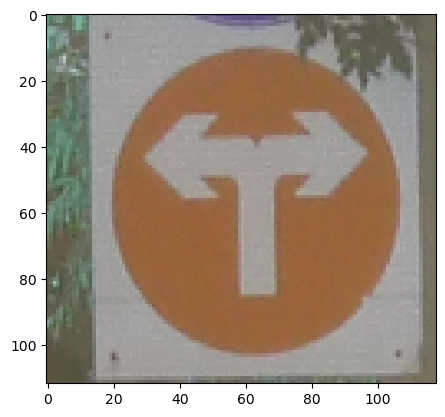

In [5]:
img = cv2.imread("/traffic_Data/DATA/23/023_0001.png") 
plt.imshow(img) 

In [6]:
labelfile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [7]:
labelfile.tail() 

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Slow down and give way
57,57,Inspection


In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2, 
                                                               subset='training', 
                                                               image_size=( 
                                                                   224, 224), 
                                                               seed=123, 
                                                               batch_size=32) 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2, 
                                                             subset='validation', 
                                                             image_size=( 
                                                                 224, 224), 
                                                             seed=123, 
                                                             batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [9]:
class_numbers = train_ds.class_names 
class_names = [] 
for i in class_numbers: 
    class_names.append(labelfile['Name'][int(i)]) 

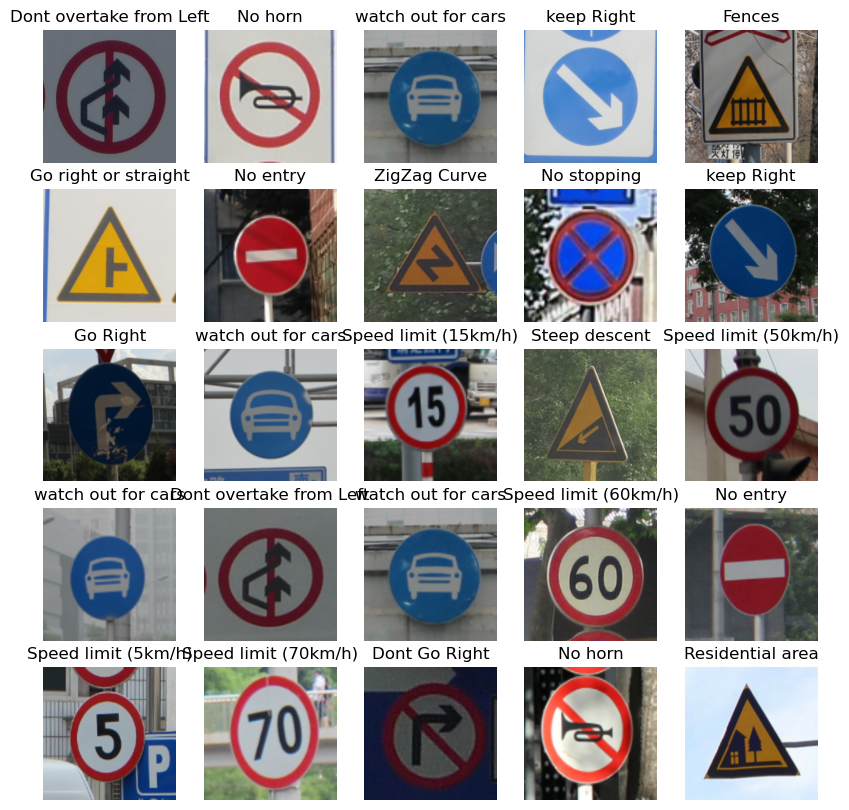

In [10]:
plt.figure(figsize=(10, 10)) 
for images, labels in train_ds.take(1): 
    for i in range(25): 
        ax = plt.subplot(5, 5, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8")) 
        plt.title(class_names[labels[i]]) 
        plt.axis("off") 
  
plt.show() 

In [11]:
data_augmentation = tf.keras.Sequential([ 
    tf.keras.layers.RandomFlip("horizontal", input_shape=(224, 224, 3)), 
    tf.keras.layers.RandomRotation(0.1), 
    tf.keras.layers.RandomZoom(0.2), 
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")
])

In [12]:
model = Sequential() 
model.add(data_augmentation) 
model.add(Rescaling(1./255)) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(256, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten()) 
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(len(labelfile), activation='softmax')) 

In [13]:
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,821,562 (10.76 MB)

 Trainable params: 2,821,562 (10.76 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
keras.utils.plot_model( 
    model, 
    show_shapes=True, 
    show_dtype=True, 
    show_layer_activations=True
) 

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['accuracy']) 

In [16]:
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)] 
history = model.fit(train_ds, 
                 validation_data=val_ds, 
                 epochs=50, 
                 callbacks=mycallbacks) 

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 862s 8s/step - accuracy: 0.1287 - loss: 3.5407 - val_accuracy: 0.3249 - val_loss: 2.4551
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 780s 7s/step - accuracy: 0.3130 - loss: 2.4956 - val_accuracy: 0.4376 - val_loss: 1.7976
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 868s 8s/step - accuracy: 0.4126 - loss: 1.9052 - val_accuracy: 0.5060 - val_loss: 1.4911
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 772s 7s/step - accuracy: 0.4489 - loss: 1.6917 - val_accuracy: 0.5995 - val_loss: 1.3975
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 780s 7s/step - accuracy: 0.4985 - loss: 1.4981 - val_accuracy: 0.6331 - val_loss: 1.1896
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 780s 7s/step - accuracy: 0.5265 - loss: 1.4395 - val_accuracy: 0.6379 - val_loss: 1.1121
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 800s 8s/step - accuracy: 0.5546 - loss: 1.3356 - val_accuracy: 0.6811 - val_loss: 1.0340
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 814s 8s/step - accuracy: 0.5752 - loss: 1.2756 - val_accu

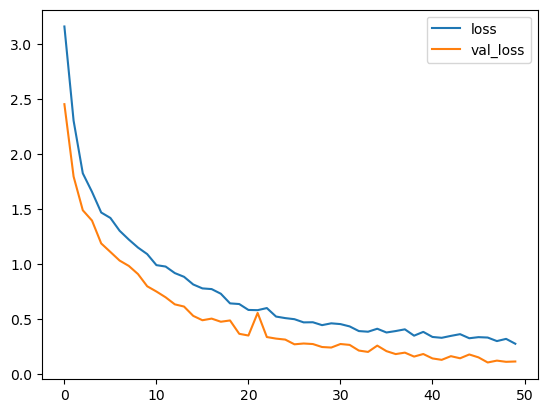

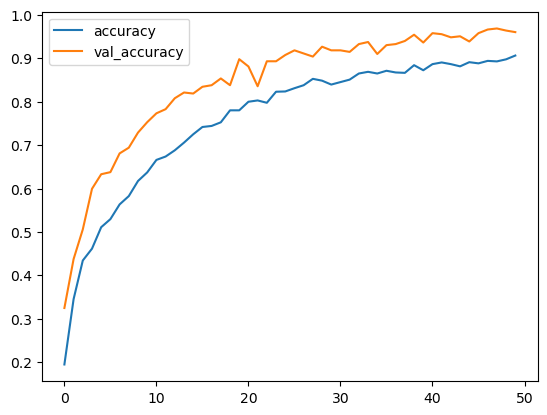

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()